# **1. Proyecto Final: Análisis de datos de Trabajadores Accidentados**

---

## Descripción

Este proyecto tiene como objetivo realizar un análisis de datos de una compañía aseguradora que contiene información de los accidentes registrados de los trabajadores asegurados.

El objetivo del análisis es poder determinar los factores que más influyen en la tasa de judicialidad del sistema.

El análisis se realiza con datos reales que han sido transformados para eliminar la información sensible.


---

## Audiencia

Este proyecto está dirigido a cualquier persona interesada en aprender técnicas de análisis de datos y modelado predictivo.

Publico en general y público interesado en la industria del seguro.

---

## Preguntas/Problema que buscamos resolver

El objetivo principal de este proyecto es desarrollar un modelo predictivo para identificar los clientes que tienen más probabilidades de realizar una acción judicial luego de un accidente laboral.

- ¿Cuáles son los factores que influyen en la tasa de judicialización de los siniestros?
- ¿Hay alguna relación entre el sexo o la edad del trabajador y la tasa de judialización?
- ¿Cómo afecta el tipo gravedad de la lesión o el diagnóstico en la tasa de judilización?
- ¿Qué tan precisos son los modelos de predicción para identificar a los clientes con mayor probabilidad de accionar judicialmente?

Para responder a estas preguntas, se realizará un análisis exploratorio de datos, se creará un modelo predictivo utilizando técnicas de aprendizaje automático y se evaluará su precisión. Además, se utilizarán técnicas de optimización de hiperparámetros para mejorar la precisión del modelo. Finalmente, se seleccionará el mejor modelo y se presentarán recomendaciones para reducir la tasa de judicialización de los accidentes laborales.



# **2. Importación de datos y librerias**

---

In [1031]:
import io, os, sys, types
# Imports de bibliotecas para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb

# Imports de bibliotecas para modelado y aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve, roc_curve, auc

In [1032]:
# Importación de datos

df= pd.read_csv("SiniestrosML_cod.csv", index_col=0, sep=';', decimal="," , encoding='latin-1')
df.head()

C:\Users\gmb\AppData\Local\miniconda33\envs\CursoCoderHouse\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Sucursal Actual Cto.,CIIU V1 Actual Sto.,CIIU V2 Actual Sto.,CIIU V3 Actual Sto.,CIIU V6 Actual Sto.,Localidad Domicilio Trabajador,CP Domicilio Trabajador,Sexo Actual,CIUO Actual,Tipo Actividad Actual,...,Indicador Juicio Actual,Juicio,Indicador Vía Pública,Initinere,Indicador Teletrabajo Actual,Prestador Ubicación Actual,Estado Siniestro Actual,Cant Dias Baja Actual,Cant Días IPP Actual,Cant Dias ILT Actual
CLIENTE,,,,,,,,,,,,,,,,,,,,,
30658480966,SAN LUIS,COMERCIO MAYORISTA Y MINORISTA,Servicios de Hotelería y Restaurante,"SERV.DE ALOJAMIENTO,COMIDA Y HOSPEDAJE PREST.H...",Servicios prestados en alojamientos por hora.,VILLA MERCEDES,5730,Femenino,Lavanderos y planchadores manuales,No Aplica,...,1,Con Juicio,0,NO,0,NASETTA MARIA MAGDALENA,En Gestión,20,44304,0
30653543168,MENDOZA,SERVICIOS FINANCIEROS,"Servicios Inmobiliarios, Empresariales y de al...",ALQUILER Y ARRENDAMIENTO DE MAQUINARIA Y EQUIPO.,Alquiler y arrendamiento de maquinaria y equip...,LUJAN DE CUYO,5500,Masculino,Oficiales y operarios de la construcción (obra...,No Aplica,...,0,Sin Juicio,0,NO,0,CUCULU SERVICIOS S A - ARG - MENDOZA,En Gestión,7,45108,0
30653489469,NEUQUÉN,SERVICIOS SOCIALES Y PERSONALES,"Educación, Investigación y desarrollo experime...",INSTRUCCION Y ENSEÐANZA.,"Enseñanza preprimaria, primaria, secundaria, s...",CIPOLLETTI,8324,Femenino,Profesores de la enseñanza secundaria,No Aplica,...,0,Sin Juicio,1,SI,0,CLINICA RADIOLOGICA DEL SUR SA,En Gestión,7,44510,0
30653489469,NEUQUÉN,SERVICIOS SOCIALES Y PERSONALES,"Educación, Investigación y desarrollo experime...",INSTRUCCION Y ENSEÐANZA.,"Enseñanza preprimaria, primaria, secundaria, s...",CIPOLLETTI,8324,Femenino,Maestros de nivel superior de la enseñanza pri...,No Aplica,...,0,Sin Juicio,0,NO,0,CLINICA RADIOLOGICA DEL SUR SA,En Gestión,148,44419,138
30653489469,NEUQUÉN,SERVICIOS SOCIALES Y PERSONALES,"Educación, Investigación y desarrollo experime...",INSTRUCCION Y ENSEÐANZA.,"Enseñanza preprimaria, primaria, secundaria, s...",CIPOLLETTI,8324,Femenino,Operadores de máquinas herramientas,No Aplica,...,0,Sin Juicio,1,SI,0,CLINICA RADIOLOGICA DEL SUR SA,En Gestión,190,44423,180


In [1033]:
df.columns

Index(['Sucursal Actual Cto.', 'CIIU V1 Actual Sto.', 'CIIU V2 Actual Sto.',
       'CIIU V3 Actual Sto.', 'CIIU V6 Actual Sto.',
       'Localidad Domicilio Trabajador', 'CP Domicilio Trabajador',
       'Sexo Actual', 'CIUO Actual', 'Tipo Actividad Actual',
       'Edad Siniestrado Actual', 'Grado Actual', '% Ultima Incapacidad',
       'Fecha Grabación Denuncia', 'Nro. Denuncia', 'Fecha Baja Médica Actual',
       'Fecha Alta Médica Actual', 'Fecha Cese ILT Actual', 'CIE10 Actual',
       'codCIE10', 'Naturaleza Lesión Actual', 'Origen Accidente Actual',
       'Agente Causante Actual', 'Forma Accidente Actual',
       'Prestador Inicial Actual', 'CUITPREST', 'Indicador Juicio Actual',
       'Juicio', 'Indicador Vía Pública', 'Initinere',
       'Indicador Teletrabajo Actual', 'Prestador Ubicación Actual',
       'Estado Siniestro Actual', 'Cant Dias Baja Actual',
       'Cant Días IPP Actual', 'Cant Dias ILT Actual'],
      dtype='object')

In [1034]:
df.dtypes

Sucursal Actual Cto.               object
CIIU V1 Actual Sto.                object
CIIU V2 Actual Sto.                object
CIIU V3 Actual Sto.                object
CIIU V6 Actual Sto.                object
Localidad Domicilio Trabajador     object
CP Domicilio Trabajador            object
Sexo Actual                        object
CIUO Actual                        object
Tipo Actividad Actual              object
Edad Siniestrado Actual             int64
Grado Actual                       object
% Ultima Incapacidad              float64
Fecha Grabación Denuncia           object
Nro. Denuncia                       int64
Fecha Baja Médica Actual           object
Fecha Alta Médica Actual           object
Fecha Cese ILT Actual              object
CIE10 Actual                       object
codCIE10                           object
Naturaleza Lesión Actual           object
Origen Accidente Actual            object
Agente Causante Actual             object
Forma Accidente Actual            

In [1035]:
# Definición de colores y estilo
sns.set_palette("pastel")
sns.set_style("whitegrid")

plt.style.use('ggplot')
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

# **3. Análisis Exploratorio de Datos (EDA)**

---

Las variables del conjunto son las siguientes:

Sucursal Actual Cto.               Sucursal del Siniestro
CIIU V1 Actual Sto.                Códificación del sector/industria/negocio
CIIU V2 Actual Sto.                Códificación del sector/industria/negocio
CIIU V3 Actual Sto.                Códificación del sector/industria/negocio
CIIU V6 Actual Sto.                Códificación del sector/industria/negocio
Localidad Domicilio Trabajador     Localidad del trabajador accidentado
CP Domicilio Trabajador            CP del trabajador accidentado
Sexo Actual                        Sexo del trabajador accidentado
CIUO Actual                        Codificación del puesto de trabajo
Tipo Actividad Actual              Tipo de actividad laboral
Edad Siniestrado Actual            Edad
Grado Actual                       Gravedad de la lesión del accidentado
% Ultima Incapacidad               % de incapacidad laboral determinada luego del tratamiento
Fecha Grabación Denuncia           Fecha de denuncia del accidente
Nro. Denuncia                      Nro de denuncia
Fecha Baja Médica Actual           Fecha de comienzo del tratamiento médico
Fecha Alta Médica Actual           Fecha fin de tratamiento médico
Fecha Cese ILT Actual              Fecha de regreso a la actividad laboral
CIE10 Actual                       Codigo del diagnóstico de la lesión
codCIE10                           Codigo del diagnóstico de la lesión
Naturaleza Lesión Actual           Tipo de lesión
Origen Accidente Actual            Origen del accidente
Agente Causante Actual             Causante de la lesión
Forma Accidente Actual             Forna del accidente
Prestador Inicial Actual           Prestador médico que realiza la atención inicial
Indicador Juicio Actual            Indicador de Juicio (num)
Juicio                             Indicador de Juicio (char)   
Initinere                          Indicador si el accidente se produjo en el viaje de ida o regreso del trabajo
Cant Dias Baja Actual              Cantidad de dias de baja laboral

3.1 Información general sobre el conjunto de datos

In [1036]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

Filas, columnas:  (283462, 36)


In [1037]:
# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)


Nombres de las variables: 
 Index(['Sucursal Actual Cto.', 'CIIU V1 Actual Sto.', 'CIIU V2 Actual Sto.',
       'CIIU V3 Actual Sto.', 'CIIU V6 Actual Sto.',
       'Localidad Domicilio Trabajador', 'CP Domicilio Trabajador',
       'Sexo Actual', 'CIUO Actual', 'Tipo Actividad Actual',
       'Edad Siniestrado Actual', 'Grado Actual', '% Ultima Incapacidad',
       'Fecha Grabación Denuncia', 'Nro. Denuncia', 'Fecha Baja Médica Actual',
       'Fecha Alta Médica Actual', 'Fecha Cese ILT Actual', 'CIE10 Actual',
       'codCIE10', 'Naturaleza Lesión Actual', 'Origen Accidente Actual',
       'Agente Causante Actual', 'Forma Accidente Actual',
       'Prestador Inicial Actual', 'CUITPREST', 'Indicador Juicio Actual',
       'Juicio', 'Indicador Vía Pública', 'Initinere',
       'Indicador Teletrabajo Actual', 'Prestador Ubicación Actual',
       'Estado Siniestro Actual', 'Cant Dias Baja Actual',
       'Cant Días IPP Actual', 'Cant Dias ILT Actual'],
      dtype='object')


In [1038]:
#Elimino las columnas que no utilizaré en el análisis
df.drop(['Cant Días IPP Actual','CIIU V2 Actual Sto.','CIIU V3 Actual Sto.',
         'CIIU V6 Actual Sto.','CP Domicilio Trabajador','Tipo Actividad Actual',  'Fecha Grabación Denuncia','Fecha Baja Médica Actual',
          'Fecha Alta Médica Actual','Fecha Cese ILT Actual','codCIE10','Indicador Juicio Actual','Indicador Vía Pública',
         'Cant Dias ILT Actual','Nro. Denuncia','CUITPREST'], axis=1,inplace=True)

In [1039]:
# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)


Tipos de datos: 
 Sucursal Actual Cto.               object
CIIU V1 Actual Sto.                object
Localidad Domicilio Trabajador     object
Sexo Actual                        object
CIUO Actual                        object
Edad Siniestrado Actual             int64
Grado Actual                       object
% Ultima Incapacidad              float64
CIE10 Actual                       object
Naturaleza Lesión Actual           object
Origen Accidente Actual            object
Agente Causante Actual             object
Forma Accidente Actual             object
Prestador Inicial Actual           object
Juicio                             object
Initinere                          object
Indicador Teletrabajo Actual        int64
Prestador Ubicación Actual         object
Estado Siniestro Actual            object
Cant Dias Baja Actual               int64
dtype: object


In [1040]:
# Verificar la presencia de valores NaN
print("\nValores faltantes: \n", print(df.isna().sum()))


Sucursal Actual Cto.              0
CIIU V1 Actual Sto.               0
Localidad Domicilio Trabajador    4
Sexo Actual                       0
CIUO Actual                       0
Edad Siniestrado Actual           0
Grado Actual                      0
% Ultima Incapacidad              0
CIE10 Actual                      0
Naturaleza Lesión Actual          0
Origen Accidente Actual           0
Agente Causante Actual            0
Forma Accidente Actual            0
Prestador Inicial Actual          0
Juicio                            0
Initinere                         0
Indicador Teletrabajo Actual      0
Prestador Ubicación Actual        0
Estado Siniestro Actual           0
Cant Dias Baja Actual             0
dtype: int64

Valores faltantes: 
 None


In [1041]:
# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())


Valores faltantes: 
 Sucursal Actual Cto.              0
CIIU V1 Actual Sto.               0
Localidad Domicilio Trabajador    4
Sexo Actual                       0
CIUO Actual                       0
Edad Siniestrado Actual           0
Grado Actual                      0
% Ultima Incapacidad              0
CIE10 Actual                      0
Naturaleza Lesión Actual          0
Origen Accidente Actual           0
Agente Causante Actual            0
Forma Accidente Actual            0
Prestador Inicial Actual          0
Juicio                            0
Initinere                         0
Indicador Teletrabajo Actual      0
Prestador Ubicación Actual        0
Estado Siniestro Actual           0
Cant Dias Baja Actual             0
dtype: int64


In [1042]:
# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))


Estadísticas descriptivas: 
        Edad Siniestrado Actual  % Ultima Incapacidad  \
count            283462.000000         283462.000000   
mean                 39.505066              1.184609   
std                  11.137704              6.412598   
min                   1.000000              0.000000   
25%                  30.000000              0.000000   
50%                  38.000000              0.000000   
75%                  47.000000              0.000000   
max                 122.000000            100.000000   

       Indicador Teletrabajo Actual  Cant Dias Baja Actual  
count                 283462.000000          283462.000000  
mean                       0.000166              30.921115  
std                        0.012876              58.523010  
min                        0.000000            -294.000000  
25%                        0.000000               4.000000  
50%                        0.000000              13.000000  
75%                        0.000000   

In [1043]:
# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())


Frecuencia de valores únicos de Sucursal Actual Cto.
BUENOS AIRES          101007
CÓRDOBA                22665
ROSARIO                18272
MORÓN                  14475
MENDOZA                13220
SAN JUAN               11461
QUILMES                10395
MAR DEL PLATA           8643
TUCUMÁN                 8374
SALTA                   7309
SANTA FE                6791
PILAR                   6691
POSADAS                 5514
NEUQUÉN                 5444
VILLA MARÍA             5263
RESISTENCIA             5252
CONCEPCIÓN              4521
BAHÍA BLANCA            4293
SAN LUIS                3480
CATAMARCA               2888
LA PLATA                2796
RAFAELA                 2700
TANDIL                  2336
VENADO TUERTO           2294
JUJUY                   2190
BARILOCHE               1763
JUNÍN                   1454
COMODORO RIVADAVIA      1069
SANTA ROSA               902
Name: Sucursal Actual Cto., dtype: int64

Frecuencia de valores únicos de CIIU V1 Actual Sto.
SERVICIOS S

No Aplica                               106679
Prestador CUIT 0                         16103
CENTRO MEDICO INTEGRAL FITZ ROY          11291
CEAC                                      6310
CUCULU SERVICIOS S A - ARG - CAP FED      5754
                                         ...  
SAN LUCAS                                    1
TUCUMAN MEDICO S.H.                          1
NUEVA 9 DE JULIO                             1
MAPAR S:RL                                   1
HOSPITAL DE JUAN A. KLIPSON                  1
Name: Prestador Inicial Actual, Length: 1201, dtype: int64

Frecuencia de valores únicos de Juicio
Sin Juicio    261804
Con Juicio     21658
Name: Juicio, dtype: int64

Frecuencia de valores únicos de Initinere
NO    230779
SI     52683
Name: Initinere, dtype: int64

Frecuencia de valores únicos de Prestador Ubicación Actual
No Aplica                                  82348
Prestador CUIT 0                           16127
CUCULU SERVICIOS S A - ARG - ROSARIO       10395
CUCULU SE

## 3.2 Análisis de valores atípicos

###3.2.1 Edad del siniestrado

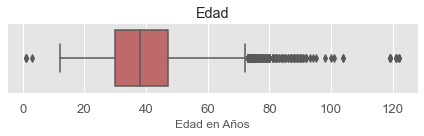

In [1044]:
    fig, axs = plt.subplots( figsize=(6,2))
    sns.boxplot(x=df['Edad Siniestrado Actual'], color='#CD5C5C')
    axs.set_title("Edad")
    plt.xlabel("Edad en Años")
    plt.tight_layout()
    plt.show()

In [1045]:
print(df['Edad Siniestrado Actual'].describe())

count    283462.000000
mean         39.505066
std          11.137704
min           1.000000
25%          30.000000
50%          38.000000
75%          47.000000
max         122.000000
Name: Edad Siniestrado Actual, dtype: float64


Pueden observarse datos de edades menores a 18 años y mayor a 70 años que no se corresponderían con una persona laboralmente activa. Reemplazaré los valores atípicos por la media

In [1046]:
#Reemplazo valores de edad >75 outliers por la mediana
median = df.loc[(df['Edad Siniestrado Actual']>75) & (df['Edad Siniestrado Actual']<18), 'Edad Siniestrado Actual'].median()
df.loc[df['Edad Siniestrado Actual'] > 75, 'Edad Siniestrado Actual'] = np.nan
df.fillna(median,inplace=True)

In [1047]:
#Reemplazo valores de edad <18  por la mediana
df.loc[df['Edad Siniestrado Actual'] <18, 'Edad Siniestrado Actual'] = np.nan
df.fillna(median,inplace=True)

###3.2.2 Cantidad de días de baja médica

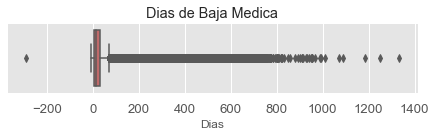

In [1048]:
    fig, axs = plt.subplots( figsize=(6,2))
    sns.boxplot(x=df['Cant Dias Baja Actual'], color='#CD5C5C')
    axs.set_title("Dias de Baja Medica")
    plt.xlabel("Dias")
    plt.tight_layout()
    plt.show()

In [1049]:
print(df['Cant Dias Baja Actual'].describe())

count    283462.000000
mean         30.921115
std          58.523010
min        -294.000000
25%           4.000000
50%          13.000000
75%          30.000000
max        1332.000000
Name: Cant Dias Baja Actual, dtype: float64


Pueden observarse valores outliers con cantidad de días de baja médica laboral menor a 0 y mayor a 365 días (límite legal). Proceso a reemplazar los valores por la mediana.

In [1050]:
#Reemplazo valores de días de baja medica laboral >365 outliers por la mediana
median = df.loc[(df['Cant Dias Baja Actual']>0) & (df['Cant Dias Baja Actual']<365), 'Cant Dias Baja Actual'].median()
df.loc[df['Cant Dias Baja Actual'] > 365 , 'Cant Dias Baja Actual'] = np.nan
df.fillna(median,inplace=True)

In [1051]:
#Reemplazoelimin valores de dias de baja medica laboral <0 outliers por 1
df.loc[df['Cant Dias Baja Actual'] <1 , 'Cant Dias Baja Actual'] = np.nan
df.fillna(1,inplace=True)

In [1052]:
print(df['Cant Dias Baja Actual'].describe())

count    283462.000000
mean         28.434252
std          45.181049
min           1.000000
25%           4.000000
50%          13.000000
75%          30.000000
max         365.000000
Name: Cant Dias Baja Actual, dtype: float64


3.2.3 % de Incapacidad del Trabajador Accidentado 

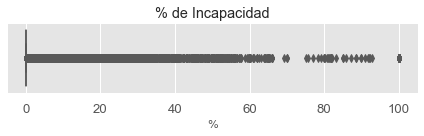

count    283462.000000
mean          1.184609
std           6.412598
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         100.000000
Name: % Ultima Incapacidad, dtype: float64


In [1053]:
    fig, axs = plt.subplots( figsize=(6,2))
    sns.boxplot(x=df['% Ultima Incapacidad'], color='#CD5C5C')
    axs.set_title("% de Incapacidad")
    plt.xlabel("%")
    plt.tight_layout()
    plt.show()

print(df['% Ultima Incapacidad'].describe())

## 3.3 Distribución de variables categóricas

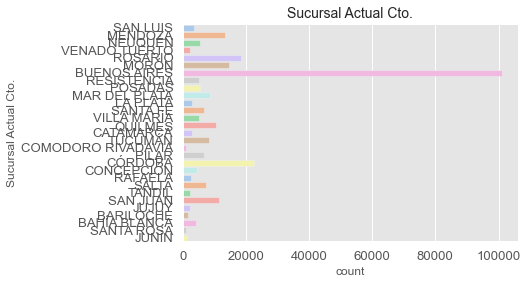

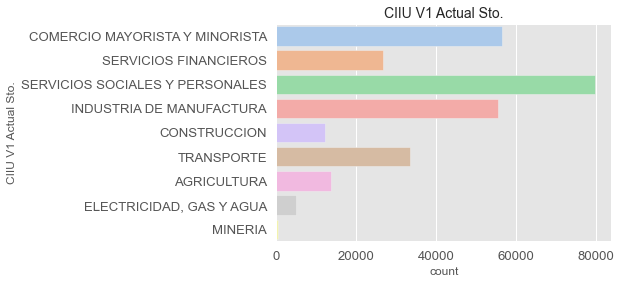

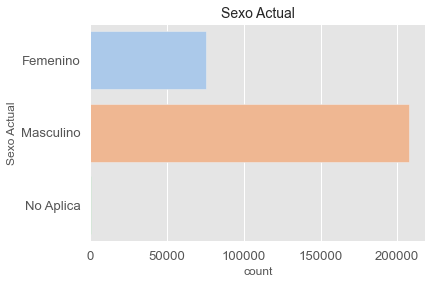

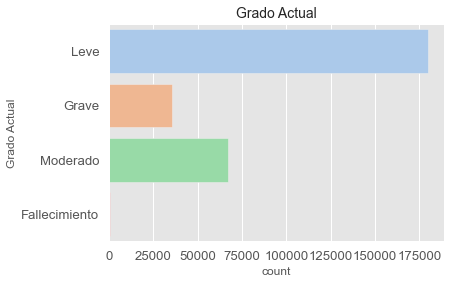

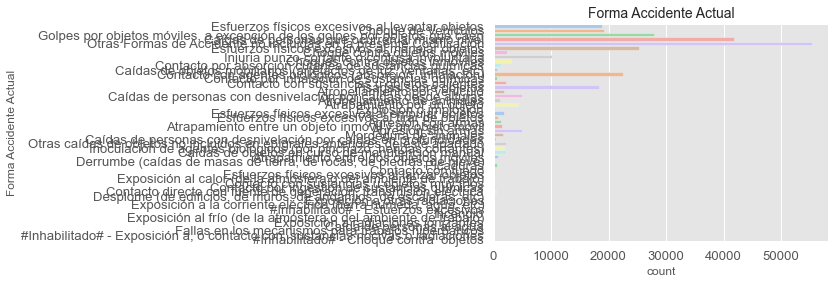

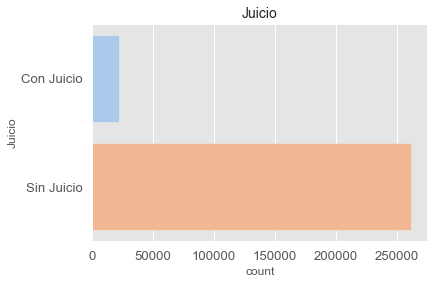

In [1054]:
#fig, axs = plt.subplots(nrows=10, ncols=1, figsize=(100, 150))
fig.suptitle('Distribución de las variables categóricas', fontsize=20, y=1.0)


cat_cols = ['Sucursal Actual Cto.','CIIU V1 Actual Sto.','Sexo Actual','Grado Actual','Forma Accidente Actual','Juicio']

#cat_cols=np.colum
for i, col in enumerate(cat_cols):
    sns.countplot(y=col, data=df , palette='pastel')
    plt.title(col, fontsize=14)
   # plt.tight_layout()
    plt.show()


## 3.4 Relación entre las variables categóricas y la tasa de Judicialidad

In [1055]:
df_temp = df[['Sucursal Actual Cto.','CIIU V1 Actual Sto.','Sexo Actual','Grado Actual','Forma Accidente Actual','Juicio']]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(80, 60))
fig.suptitle('Relación entre variables categóricas y la tasa de Juicios', fontsize=20, y=10)

for i, col in enumerate(cat_cols):
    row = i // 2
    pos = i % 2
    sns.countplot(y=col, hue='Juicio', data=df_temp, ax=axs[row][pos], palette='pastel')
    axs[row][pos].set_title(col, fontsize=14)
    axs[row][pos].set_xlabel('Count')
    axs[row][pos].set_ylabel('', fontsize=12)
    axs[row][pos].legend(title='Juicios', loc='upper right')

plt.tight_layout()
plt.show()

## 3.5 Distribución de variables numéricas

Media de Edad Siniestrado Actual: 38.0
Media de Cant Dias Baja Actual: 13.0
Media de % Ultima Incapacidad: 0.0


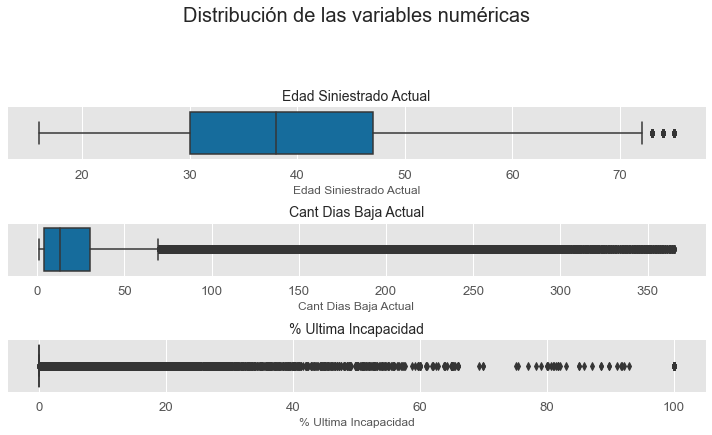

In [1056]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 5))
fig.suptitle('Distribución de las variables numéricas', fontsize=20, y=1.2)

# Variables numéricas
num_cols = ['Edad Siniestrado Actual',  'Cant Dias Baja Actual', '% Ultima Incapacidad']

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axs[i], color='#0072B2')
    axs[i].set_title(col, fontsize=14)
    print(f'Media de {col}: {df[col].median()}')

plt.tight_layout()
plt.show()

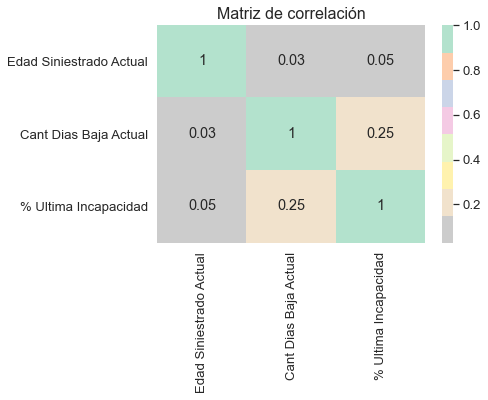

In [1057]:
# Correlación entre variables numéricas
corr_matrix = df[num_cols].corr()

sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2_r')
plt.title('Matriz de correlación', fontsize=16)
plt.show()

## 3.6 Relación entre las variables numericas y la tasa de Juicios

## 3.7 Tasa de Juicios

In [1058]:
total_siniestros = df['Sexo Actual'].count()
siniestros_con_juicios = df['Juicio'].loc[df['Juicio'] == 'Con Juicio'].count()
tasa_juicios = siniestros_con_juicios / total_siniestros
print( 'Tasa de Juicios: {:.2%}'.format(tasa_juicios))

Tasa de Juicios: 7.64%


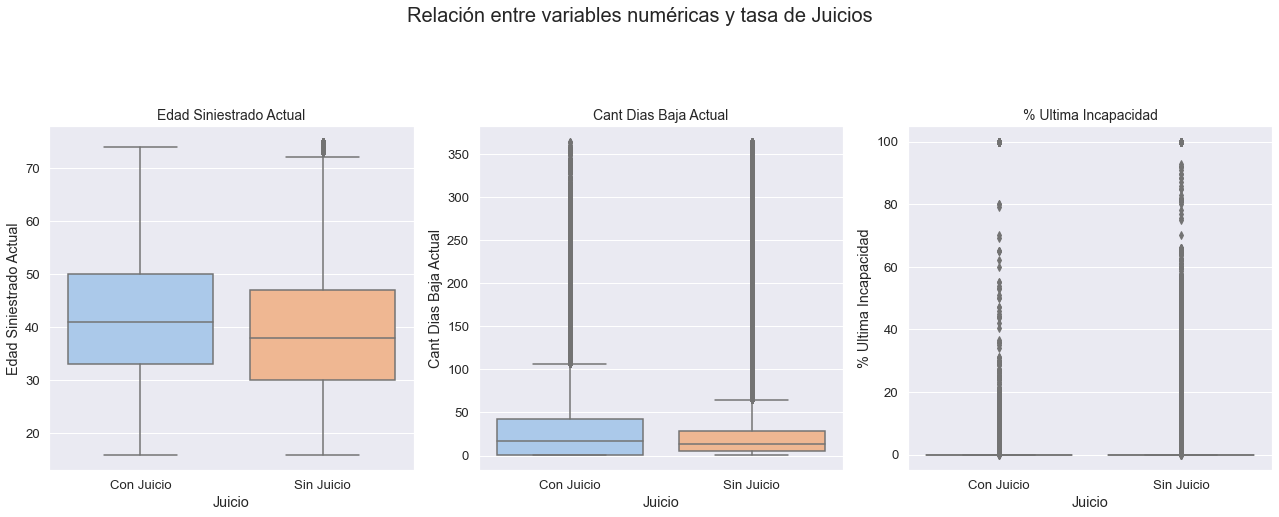

In [1059]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Relación entre variables numéricas y tasa de Juicios', fontsize=20, y=1.2)

for i, col in enumerate(num_cols):
   sns.boxplot(x='Juicio', y=col, data=df, ax=axs[i], palette='pastel')
   axs[i].set_title(col, fontsize=14)

plt.tight_layout()
plt.show()

3.8 Análisis de Insights específicos para responder a las preguntas de investigación

Pregunta: ¿Hay alguna relación entre el sexo del trabajador accidentado y los juicios?

In [1060]:
# Tabla de contingencia de género y tipo de contrato
pd.crosstab(index=df['Sexo Actual'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")

Juicio,Con Juicio,Sin Juicio
Sexo Actual,,
Femenino,6.08%,93.92%
Masculino,8.20%,91.80%
No Aplica,10.49%,89.51%


Podemos observar que la tasa de juicios de los hombres es levemente superior a la de las mujeres y a la tasa promedio (7,64%)

Pregunta: ¿Hay alguna relación entre la cantidad de dias de baja médica laboral del trabajador accidentado y los juicios?

In [1061]:
# Tabla de contingencia de dias de baja laboral / % de Incapacidad laboral 

# create intervals
bins = pd.interval_range(0, 360, freq=60)

# assign each value in df["column"] to bin and count bin occurences
df['Rango_DiasBaja'] = pd.cut(df['Cant Dias Baja Actual'], bins)

#df.columns
pd.crosstab(index=df['Rango_DiasBaja'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")

Juicio,Con Juicio,Sin Juicio
Rango_DiasBaja,,
"(0, 60]",7.18%,92.82%
"(60, 120]",10.73%,89.27%
"(120, 180]",10.57%,89.43%
"(180, 240]",10.70%,89.30%
"(240, 300]",13.10%,86.90%
"(300, 360]",11.14%,88.86%


Vemos que los casos de hasta 60 días de baja laboral tienen una tasa de juicios mucho menor que la del resto del conjunto de datos.

Pregunta: ¿Hay alguna relación entre el % de incapacidad resultante del trabajador accidentado y los juicios?

In [1062]:
# Tabla de contingencia de Juicio / % de Incapacidad laboral 

# create intervals
bins = pd.interval_range(0, 100, freq=20)

# assign each value in df["column"] to bin and count bin occurences
df['%Incapacidad_Rango'] = pd.cut(df['% Ultima Incapacidad'], bins)

#df.columns
pd.crosstab(index=df['%Incapacidad_Rango'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")

Juicio,Con Juicio,Sin Juicio
%Incapacidad_Rango,,
"(0, 20]",8.69%,91.31%
"(20, 40]",5.34%,94.66%
"(40, 60]",8.00%,92.00%
"(60, 80]",16.98%,83.02%
"(80, 100]",15.05%,84.95%


Observamos que en los rangos superiores de incapacidad se produce la mayor cantidad de juicios al igual que en la primer clase del rango de las incapacidades de entre 0 y 5%.

Pregunta: ¿Hay alguna relación entre la gravedad de la lesión del trabajador accidentado y los juicios?

In [1063]:
# Tabla de contingencia de género y tipo de contrato
pd.crosstab(index=df['Grado Actual'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")

Juicio,Con Juicio,Sin Juicio
Grado Actual,,
Fallecimiento,15.25%,84.75%
Grave,8.61%,91.39%
Leve,5.76%,94.24%
Moderado,12.06%,87.94%


Se observa que los casos de gravedad moderada y fallecidos son los que mayor tasa de juicios tienen.

Pregunta: ¿Hay alguna relación entre los accidentes producidos en el lugar de trabajo, en el viaje al trabajo y los juicios?

In [1064]:
# Tabla de contingencia de género y tipo de contrato
pd.crosstab(index=df['Initinere'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")

Juicio,Con Juicio,Sin Juicio
Initinere,,
NO,7.66%,92.34%
SI,7.55%,92.45%


En este caso vemos que ambos casos se comportan igual y los % de juicios son similares a la media del total de los datos.

Pregunta: ¿Hay alguna relación entre la edad del trabajador accidentado y los juicios?

In [1065]:
# create intervals
bins = pd.interval_range(0, 100, freq=10)

# assign each value in df["column"] to bin and count bin occurences
df['Edad_Rango'] = pd.cut(df['Edad Siniestrado Actual'], bins)

#df.columns

In [1066]:
# Tabla de contingencia entre el rango de edad y el % de juicios
pd.crosstab(index=df['Edad_Rango'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")


Juicio,Con Juicio,Sin Juicio
Edad_Rango,,
"(10, 20]",3.27%,96.73%
"(20, 30]",5.52%,94.48%
"(30, 40]",7.64%,92.36%
"(40, 50]",8.16%,91.84%
"(50, 60]",9.27%,90.73%
"(60, 70]",12.43%,87.57%
"(70, 80]",7.01%,92.99%


Vemos que a mayor edad mayor es la tasa de juicios.

### Pregunta: ¿Cómo afecta el tipo de industria en la cantidad de juicios?

In [1067]:
pd.crosstab(index=df['CIIU V1 Actual Sto.'], columns=df['Juicio'], normalize='index').style.format("{:.2%}")

Juicio,Con Juicio,Sin Juicio
CIIU V1 Actual Sto.,,
AGRICULTURA,5.39%,94.61%
COMERCIO MAYORISTA Y MINORISTA,7.79%,92.21%
CONSTRUCCION,6.96%,93.04%
"ELECTRICIDAD, GAS Y AGUA",4.57%,95.43%
INDUSTRIA DE MANUFACTURA,8.17%,91.83%
MINERIA,5.68%,94.32%
SERVICIOS FINANCIEROS,8.16%,91.84%
SERVICIOS SOCIALES Y PERSONALES,5.92%,94.08%
TRANSPORTE,11.86%,88.14%


Podemos observar que los trabajadores de la industria del transporte son los que tienen mayor tasa de juicios en el caso de tener un accidente laboral, mientras que en el otro extremo los trabajadores de servicios públicos (GAS,AGUA,ENERGIA) y los trabajadores rurales son los que menos judicialidad presentan.

# # Principales Insights

Luego de analizar las principales variables contenidas en el conjunto de datos podemos concluir que los fatcores que más influencia tienen en la tasa de Judicialidad son:

a) Gravedad de la lesion del trabajador: Los accidentados con mayor % de incapacidad presentan mayor judicialidad en conjunto con los que tienen muy poca o sin incapacidad, en  este caso se entiende que es por disconformidad con lo dispuesto por los médicos. 

b) % de incapacidad resultante del accidente: Los fallecidos y los graves son los que mayor tasa de judicilidad.

c) Cantidad de dias de Baja: Se observa un incremento importante en la tasa de judicialidad para los accidentados con mas de 60 días de baja laboral.

d) Edad del siniestrado: A mayor edad mayor es la judicialidad

e) CIU3 - Actividad Laboral: Se observa marcado incremento en la judicilidad en la industria del transporte. Las que menor judicialidad presentan son Agrucultura y Servicios Públicos.

También entendemos que la variable "Initinere" que indica si el accidente se produce en el lugar de trabajo o en el desplazamiento desde el hogar al trabajo no tiene inlfuencia sobre la tasa de judicialidad.

# # 4. Ingeniería de atributos


Con el análisis exploratorio de datos se identificaron las variables mas importantes para la predicción de la tasa de judicialidad:

- Gravedad de la lesion del trabajador
- % de incapacidad resultante del accidente
- Cantidad de dias de Baja
- Edad del siniestrado
- CIU3 - Actividad Laboral


CIIU V1 Actual Sto.               object
Sexo Actual                       object
CIUO Actual                       object
Edad Siniestrado Actual            int64
Grado Actual                      object
% Ultima Incapacidad              object
CIE10 Actual                      object
Juicio                            object
Initinere                         object
Cant Dias Baja Actual              int64

4.1 Conversion de variables categoricas(con mas de dos categorias) en dummies.

In [1068]:
# Convierto las variables categoricas a numericas:

dummies = pd.get_dummies(df['Grado Actual'], prefix='Grado_')

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['Grado Actual'])


dummies = pd.get_dummies(df['Sexo Actual'], prefix='Sexo_')

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['Sexo Actual'])


dummies = pd.get_dummies(df['%Incapacidad_Rango'], prefix='Incap%_')

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['%Incapacidad_Rango'])


dummies = pd.get_dummies(df['CIIU V1 Actual Sto.'], prefix='CIIU_')

# Añadimos las variables binarias al DataFrame
df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
df = df.drop(columns=['CIIU V1 Actual Sto.'])


#dummies = pd.get_dummies(df['Juicio'], prefix='Juicio_')

# Añadimos las variables binarias al DataFrame
#df = pd.concat([df, dummies], axis = 1)

# Eliminamos la vairable original race
#df = df.drop(columns=['Juicio'])






In [1069]:
df.columns

Index(['Sucursal Actual Cto.', 'Localidad Domicilio Trabajador', 'CIUO Actual',
       'Edad Siniestrado Actual', '% Ultima Incapacidad', 'CIE10 Actual',
       'Naturaleza Lesión Actual', 'Origen Accidente Actual',
       'Agente Causante Actual', 'Forma Accidente Actual',
       'Prestador Inicial Actual', 'Juicio', 'Initinere',
       'Indicador Teletrabajo Actual', 'Prestador Ubicación Actual',
       'Estado Siniestro Actual', 'Cant Dias Baja Actual', 'Rango_DiasBaja',
       'Edad_Rango', 'Grado__Fallecimiento', 'Grado__Grave', 'Grado__Leve',
       'Grado__Moderado', 'Sexo__Femenino', 'Sexo__Masculino',
       'Sexo__No Aplica', 'Incap%__(0, 20]', 'Incap%__(20, 40]',
       'Incap%__(40, 60]', 'Incap%__(60, 80]', 'Incap%__(80, 100]',
       'CIIU__AGRICULTURA', 'CIIU__COMERCIO MAYORISTA Y MINORISTA',
       'CIIU__CONSTRUCCION', 'CIIU__ELECTRICIDAD, GAS Y AGUA',
       'CIIU__INDUSTRIA DE MANUFACTURA', 'CIIU__MINERIA',
       'CIIU__SERVICIOS FINANCIEROS', 'CIIU__SERVICIOS SOCIA

Conversion de variables categoricas de dos categorias en binarias.

In [1070]:
binary_vars = ['Juicio']

labelencoder = LabelEncoder()

for var in binary_vars:
    df[var] = labelencoder.fit_transform(df[var])

Normalización de variables.

In [1071]:
scaler = MinMaxScaler()
df['Juicio'] = scaler.fit_transform(df[['Juicio']])

# **5. Entrenamiento y Testeo**

---

## 5.1 División de datos

In [1072]:
df.columns

Index(['Sucursal Actual Cto.', 'Localidad Domicilio Trabajador', 'CIUO Actual',
       'Edad Siniestrado Actual', '% Ultima Incapacidad', 'CIE10 Actual',
       'Naturaleza Lesión Actual', 'Origen Accidente Actual',
       'Agente Causante Actual', 'Forma Accidente Actual',
       'Prestador Inicial Actual', 'Juicio', 'Initinere',
       'Indicador Teletrabajo Actual', 'Prestador Ubicación Actual',
       'Estado Siniestro Actual', 'Cant Dias Baja Actual', 'Rango_DiasBaja',
       'Edad_Rango', 'Grado__Fallecimiento', 'Grado__Grave', 'Grado__Leve',
       'Grado__Moderado', 'Sexo__Femenino', 'Sexo__Masculino',
       'Sexo__No Aplica', 'Incap%__(0, 20]', 'Incap%__(20, 40]',
       'Incap%__(40, 60]', 'Incap%__(60, 80]', 'Incap%__(80, 100]',
       'CIIU__AGRICULTURA', 'CIIU__COMERCIO MAYORISTA Y MINORISTA',
       'CIIU__CONSTRUCCION', 'CIIU__ELECTRICIDAD, GAS Y AGUA',
       'CIIU__INDUSTRIA DE MANUFACTURA', 'CIIU__MINERIA',
       'CIIU__SERVICIOS FINANCIEROS', 'CIIU__SERVICIOS SOCIA

In [1073]:

X = df.drop(['Sucursal Actual Cto.', 'Localidad Domicilio Trabajador', 'CIUO Actual', 'CIE10 Actual',
        '% Ultima Incapacidad', 'Edad_Rango',
       'Naturaleza Lesión Actual', 'Origen Accidente Actual',
       'Agente Causante Actual', 'Forma Accidente Actual',
       'Prestador Inicial Actual', 'Initinere', 'Rango_DiasBaja',
       'Indicador Teletrabajo Actual', 'Prestador Ubicación Actual',
       'Estado Siniestro Actual', 'Juicio' ], axis=1)
y = df['Juicio']

# Conjunto de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1074]:
X.columns

Index(['Edad Siniestrado Actual', 'Cant Dias Baja Actual',
       'Grado__Fallecimiento', 'Grado__Grave', 'Grado__Leve',
       'Grado__Moderado', 'Sexo__Femenino', 'Sexo__Masculino',
       'Sexo__No Aplica', 'Incap%__(0, 20]', 'Incap%__(20, 40]',
       'Incap%__(40, 60]', 'Incap%__(60, 80]', 'Incap%__(80, 100]',
       'CIIU__AGRICULTURA', 'CIIU__COMERCIO MAYORISTA Y MINORISTA',
       'CIIU__CONSTRUCCION', 'CIIU__ELECTRICIDAD, GAS Y AGUA',
       'CIIU__INDUSTRIA DE MANUFACTURA', 'CIIU__MINERIA',
       'CIIU__SERVICIOS FINANCIEROS', 'CIIU__SERVICIOS SOCIALES Y PERSONALES',
       'CIIU__TRANSPORTE'],
      dtype='object')

## 5.2 Entrenamiento y evaluación de modelos:

In [1075]:
y.head()

CLIENTE
30658480966    0.0
30653543168    1.0
30653489469    1.0
30653489469    1.0
30653489469    1.0
Name: Juicio, dtype: float64

Los modelos elegidos fueron Árboles de decisión, Regresión Logística, Máquinas de Vectores de Soporte (SVM) y Redes Neuronales Artificiales

### 5.2.1 Modelo de árbol de decisión

In [1076]:
# Modelo
dt = DecisionTreeClassifier(random_state=42)

# Entrenamiento
dt.fit(X_train, y_train)

# Predicción
y_pred = dt.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de árbol de decisión:", accuracy)

Precisión del modelo de árbol de decisión: 0.8912740549979715


### 5.2.2 Regresión logística

In [1077]:
# Modelo
lr = LogisticRegressionCV(cv=5, max_iter=1000, random_state=42)

# Entrenamiento
lr.fit(X_train, y_train)

# Predicción
y_pred = lr.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.9236237277970826


### 5.2.3 Máquinas de vectores de soporte (SVM)

In [1078]:
# Modelo
svc = SVC()

# Entrenamiento
svc.fit(X_train, y_train)

# Predicción
y_pred = svc.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de SVM:", accuracy)

Precisión del modelo de SVM: 0.9236237277970826


### 5.2.4 Redes neuronales artificiales

In [1079]:
# Modelo
nn = MLPClassifier(max_iter = 500)

# Entrenamiento
nn.fit(X_train, y_train)

# Predicción
y_pred = nn.predict(X_test)

# Precisión
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de red neuronal:", accuracy)

Precisión del modelo de red neuronal: 0.9236237277970826


## 5.3 Validación cruzada

In [1080]:
num_folds = 5

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

models = [
    ('Regresion Logistica', LogisticRegressionCV(max_iter=1000)),
    ('Arbol de Decision', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('Red Neuronal', MLPClassifier(max_iter=10000))
]

# Metricas
results = []
names = []
print('Metricas \n----------------------\n')
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {round(cv_results.mean(), 5)} ({round(cv_results.std(), 5)})')

Metricas 
----------------------

Regresion Logistica: 0.92359 (0.00026)
Arbol de Decision: 0.8892 (0.00093)
SVM: 0.92359 (0.00026)
Red Neuronal: 0.92358 (0.00025)


# **6. Optimización y selección de modelo**

---

In [1081]:
# Hiperparámetros
params = [{'Regresion Logistica__Cs': [1, 10],
           'Regresion Logistica__penalty': ['l1', 'l2'],
           'Regresion Logistica__solver': ['liblinear']},

          {'Arbol de Decision__max_depth': [2, 4, 6],
           'Arbol de Decision__min_samples_split': [2, 4, 6]},

          {'SVM__C': [0.1, 1, 10],
           'SVM__kernel': ['linear', 'rbf']},

          {'Red Neuronal__hidden_layer_sizes': [(10,), (50,), (100,)],
           'Red Neuronal__activation': ['relu', 'logistic'],
           'Red Neuronal__alpha': [0.0001, 0.01, 0.1]}]


result = []
best_models = []
# Búsqueda de hiperparámetros para cada modelo
for i, (name, model) in enumerate(models):
    pipe = Pipeline([(name, model)])
    grid = GridSearchCV(pipe, params[i], cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
    grid.fit(X_train, y_train)

    best_model = (name, grid.best_estimator_)
    best_score = grid.best_score_
    best_models.append(best_model)
    result.append({'Modelo': name, 'Score': round(best_score, 5), 'Hiperparámetros': grid.best_params_})

    print(name + ':')
    print('Mejores parametros:', grid.best_params_)
    print('Precisión del entrenamiento:', round(grid.best_score_, 5))
    print('Precisión del test:', round(grid.score(X_test, y_test), 5))
    print('--------------------------------------------')

# Ordenamiento de los resultados
result = sorted(result, key=lambda k: k['Score'], reverse=True)
print('Orden de los modelos: ')
for res in result:
    print(res)

Regresion Logistica:
Mejores parametros: {'Regresion Logistica__Cs': 1, 'Regresion Logistica__penalty': 'l1', 'Regresion Logistica__solver': 'liblinear'}
Precisión del entrenamiento: 0.92359
Precisión del test: 0.92362
--------------------------------------------
Arbol de Decision:
Mejores parametros: {'Arbol de Decision__max_depth': 2, 'Arbol de Decision__min_samples_split': 2}
Precisión del entrenamiento: 0.92359
Precisión del test: 0.92362
--------------------------------------------
SVM:
Mejores parametros: {'SVM__C': 0.1, 'SVM__kernel': 'linear'}
Precisión del entrenamiento: 0.92359
Precisión del test: 0.92362
--------------------------------------------
Red Neuronal:
Mejores parametros: {'Red Neuronal__activation': 'relu', 'Red Neuronal__alpha': 0.01, 'Red Neuronal__hidden_layer_sizes': (10,)}
Precisión del entrenamiento: 0.92359
Precisión del test: 0.92362
--------------------------------------------
Orden de los modelos: 
{'Modelo': 'Regresion Logistica', 'Score': 0.92359, 'Hip

# **7. Conclusión**

---

Se aplicaron cuatro modelos de aprendizaje supervisado para predecir la tasa de juicios para trabajadores accidentados: Regresión Logística, Árbol de Decisión, SVM y Red Neuronal. Después de la optimización de hiperparámetros, se encontró que los modelos SVM, Regresión Logística y Red Neuronaltuvo tuvieron desempeños excelentes y similares en términos de precisión de prueba.

En conclusión, el análisis exploratorio de datos y los modelos de aprendizaje supervisado aplicados en este proyecto proporcionan una valiosa herramienta para identificar de manera temprana los casos que pueden llegar a evoluciona en una acción judicial y actuar preventivamente, reduciendo los costos para la aseguradora.
